In [1]:
import numpy as np

from magpylib.magnet import Cuboid

# Create cube and set linear path
cube = Cuboid(magnetization=(0, 0, 0.1), dimension=(0.02, 0.02, 0.02))
cube.position = np.linspace((0, 0, 0), (0.1, 0, 0), 60)

# Apply rotation about self - starting at index 0
cube.rotate_from_rotvec(np.linspace((0, 0, 0), (0, 0, 360), 30), start=0)

# Apply rotation about origin - starting at index 30
cube.rotate_from_rotvec(np.linspace((0, 0, 0), (0, 0, 360), 30), anchor=0, start=30)

# Display paths as animation
cube.show(backend="plotly", animation=True)

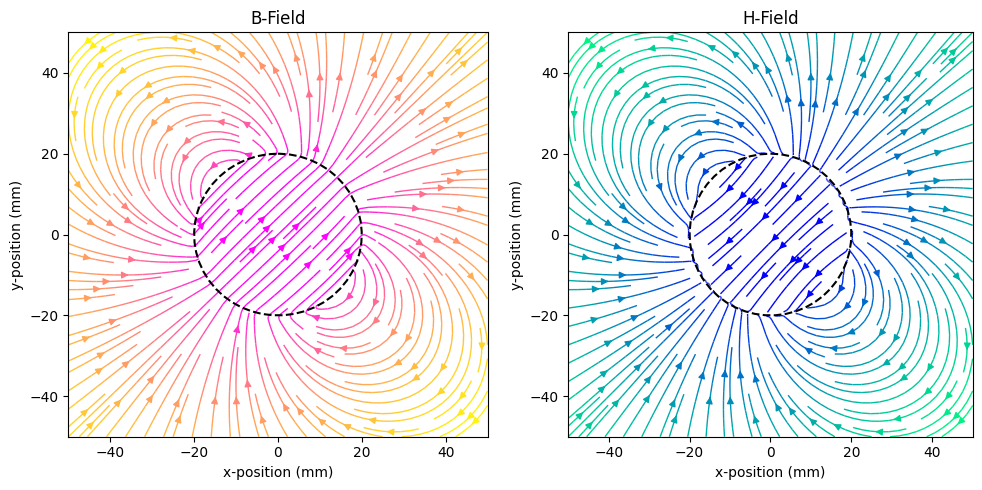

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import magpylib as magpy

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

# Create an observer grid in the xz-symmetry plane
X, Y = np.mgrid[-0.05:0.05:100j, -0.05:0.05:100j].transpose((0, 2, 1))
grid = np.stack([X, Y, np.zeros((100, 100))], axis=2)

# Compute B- and H-fields of a cylinder magnet on the grid
cyl = magpy.magnet.Cylinder(magnetization=(0.5, 0.5, 0), dimension=(0.04, 0.02))
B = cyl.getB(grid)
H = cyl.getH(grid)

# Display field with Pyplot
ax1.streamplot(
    grid[:, :, 0] * 1000,  # m -> mm
    grid[:, :, 1] * 1000,  # m -> mm
    B[:, :, 0],
    B[:, :, 1],
    density=1.5,
    color=np.log(np.linalg.norm(B, axis=2)),
    linewidth=1,
    cmap="spring_r",
)

ax2.streamplot(
    grid[:, :, 0] * 1000,  # m -> mm
    grid[:, :, 1] * 1000,  # m -> mm
    H[:, :, 0],
    H[:, :, 1],
    density=1.5,
    color=np.log(np.linalg.norm(B, axis=2)),
    linewidth=1,
    cmap="winter_r",
)

ax1.set(
    title="B-Field",
    xlabel="x-position (mm)",
    ylabel="y-position (mm)",
)
ax2.set(
    title="H-Field",
    xlabel="x-position (mm)",
    ylabel="y-position (mm)",
    aspect=1,
)
# Outline magnet boundary
for ax in [ax1, ax2]:
    ts = np.linspace(0, 2 * np.pi, 50)
    ax.plot(20 * np.sin(ts), 20 * np.cos(ts), "k--")

plt.tight_layout()
plt.show()